### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline 

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
user = pd.read_csv('user.csv')
data = pd.read_csv('data.csv')
item = pd.read_csv('item.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [3]:
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
user.dtypes

user id        int64
age            int64
gender        object
occupation    object
zip code      object
dtype: object

In [5]:
user.shape

(943, 5)

In [6]:
user.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [7]:
user.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [8]:
data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [9]:
data.shape

(100000, 4)

In [10]:
data.dtypes

user id      int64
movie id     int64
rating       int64
timestamp    int64
dtype: object

In [11]:
data.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [12]:
data.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [13]:
item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [14]:
item.shape

(1681, 22)

In [15]:
item.dtypes

movie id         int64
movie title     object
release date    object
unknown          int64
Action           int64
Adventure        int64
Animation        int64
Childrens        int64
Comedy           int64
Crime            int64
Documentary      int64
Drama            int64
Fantasy          int64
Film-Noir        int64
Horror           int64
Musical          int64
Mystery          int64
Romance          int64
Sci-Fi           int64
Thriller         int64
War              int64
Western          int64
dtype: object

In [16]:
item.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
item.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 5 marks

In [24]:
# use sum on the default axis
item.iloc[:,3:].sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [14]:
#hint: use sum on the axis = 1
item.iloc[:,2:].sum(axis=1)

0       3
1       3
2       1
3       3
4       3
5       1
6       2
7       3
8       1
9       2
10      2
11      2
12      1
13      2
14      1
15      2
16      5
17      1
18      1
19      2
20      5
21      3
22      2
23      3
24      1
25      1
26      1
27      3
28      4
29      1
       ..
1651    1
1652    1
1653    2
1654    2
1655    2
1656    1
1657    1
1658    1
1659    1
1660    2
1661    2
1662    1
1663    1
1664    1
1665    1
1666    1
1667    3
1668    2
1669    1
1670    1
1671    2
1672    1
1673    1
1674    1
1675    1
1676    1
1677    2
1678    2
1679    1
1680    1
Length: 1681, dtype: int64

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [37]:
item.drop(item[item['unknown'] == 1].index, inplace = True)
item.shape

(1680, 22)

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [197]:
#a = 'My*cat*is*brown'
#print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

#print(a[10:])
#print(a[-5:])


1995


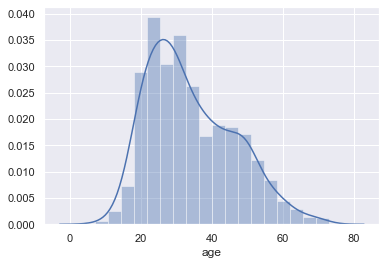

In [38]:
#your answers here
sns.distplot(user['age']);

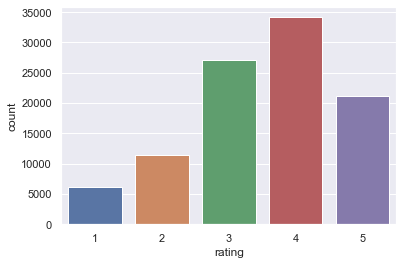

In [39]:
sns.countplot(data['rating']);

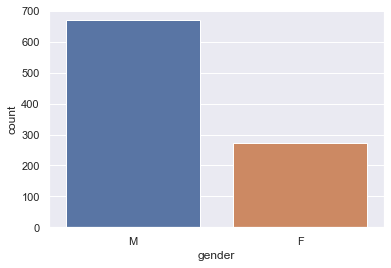

In [40]:
sns.countplot(user['gender']);

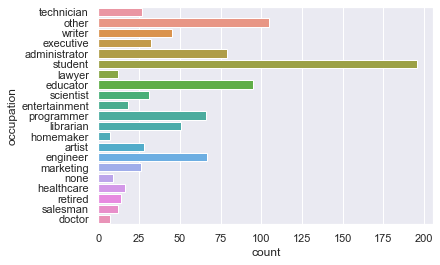

In [41]:
sns.countplot(y=user['occupation']);

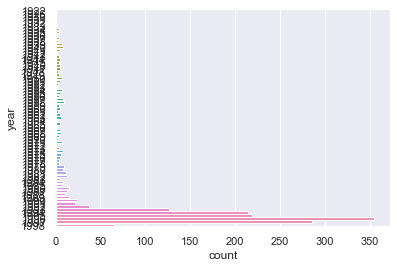

In [16]:
item[['day', 'month', 'year']] = item['release date'].str.split('-',expand=True)
sns.countplot(y=item['year']);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [30]:
#Your answer here
gen = item.groupby('year').mean()
gen.drop(['movie id'], axis=1, inplace=True)
gen.head()

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,
1922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1931,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


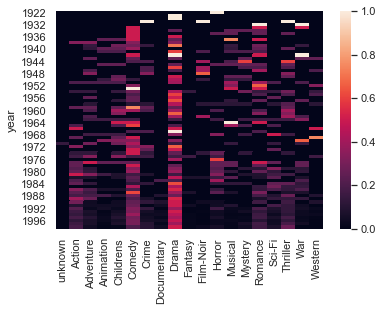

In [23]:
sns.heatmap(gen)

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [45]:
#your answer here
toprat = data.iloc[:,[1,2]]
toprat = toprat.groupby('movie id').mean()
toprat.head()
topuser = data.iloc[:,[1,0]]
topuser = topuser.groupby('movie id').count()
topuser.head()

topratuser = pd.merge(toprat, topuser, on='movie id', how='outer')
topratuser.columns = ['average rating', 'user rating count'] 
topratuser.head()

topratuser.drop(topratuser[topratuser['user rating count'] <= 100].index, inplace = True)
topratuser = topratuser.sort_values(by=['average rating'],ascending=False)
topratuser.iloc[0:25,]

,average rating,user rating count
movie id,,
408,4.491071,112
318,4.466443,298
169,4.466102,118
483,4.456790,243
64,4.445230,283
603,4.387560,209
12,4.385768,267
50,4.358491,583
178,4.344000,125


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [46]:
userdata = pd.merge(data,user[['user id','gender']], on=['user id'], how='left')

In [47]:
userdata.drop(columns=['timestamp','user id'], inplace=True)

In [48]:
userdata = pd.pivot_table(userdata,index='movie id', columns='gender', values='rating', aggfunc=[len])
userdata.columns = ['f ratings','m ratings']
userdata.head(16)

,f ratings,m ratings
movie id,,
1,119.0,333.0
2,19.0,112.0
3,16.0,74.0
4,45.0,164.0
5,22.0,64.0
6,5.0,21.0
7,82.0,310.0
8,60.0,159.0
9,83.0,216.0


In [49]:
userdataitem = pd.merge(item,userdata, on=['movie id'], how='left')
#userdataitem.iloc[:,[25,26]]
userdataitem..head(16)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Romance,Sci-Fi,Thriller,War,Western,day,month,year,f ratings,m ratings
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,01,Jan,1995,119.0,333.0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,1,0,0,01,Jan,1995,19.0,112.0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,1,0,0,01,Jan,1995,16.0,74.0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,01,Jan,1995,45.0,164.0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,1,0,0,01,Jan,1995,22.0,64.0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,01,Jan,1995,5.0,21.0
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,1,0,0,0,01,Jan,1995,82.0,310.0
7,8,Babe,01-Jan-1995,0,0,0,0,1,1,0,...,0,0,0,0,0,01,Jan,1995,60.0,159.0
8,9,Dead Man Walking,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,01,Jan,1995,83.0,216.0
9,10,Richard III,22-Jan-1996,0,0,0,0,0,0,0,...,0,0,0,1,0,22,Jan,1996,20.0,69.0


In [54]:
userdataitem.sum()

movie id                                                  1413763
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         0
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

In [55]:
#Men watch more drama than women
userdataitem.groupby('Drama')['f ratings','m ratings'].sum()
#Results - DRAMA=1 TRUE (Men watch more drama than women)

,f ratings,m ratings
Drama,,
0,14730.0,45365.0
1,11008.0,28887.0


In [56]:
#Women watch more Sci-Fi than men
userdataitem.groupby('Sci-Fi')['f ratings','m ratings'].sum()
#Results - SCI-FI=1 FALSE (Men watch more Sci-Fi than women)

,f ratings,m ratings
Sci-Fi,,
0,23109.0,64151.0
1,2629.0,10101.0


In [57]:
#Men watch more Romance than women
userdataitem.groupby('Romance')['f ratings','m ratings'].sum()
#Results - ROMANCE=1 TRUE (Men watch more Romance than women)

,f ratings,m ratings
Romance,,
0,19880.0,60649.0
1,5858.0,13603.0


In [ ]:
#The overall data set has 74K men review and 25K female review. The probability of 
#Men watching any genre movies is higher than women